In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [18]:
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import seaborn as sns

import covid19

## data

In [19]:
istat_path = 'comune_giorno.csv'
_, istat = covid19.data.read_istat(istat_path)

istat_italy = istat.sel(year=2020).sum(['location', 'age_class'])
istat_italy -= istat_italy.sel(time=slice(None, '2020-02-20')).mean()
istat_italy = istat_italy.sel(time=slice(None, '2020-03-28'))
istat_italy

<xarray.DataArray (time: 88)>
array([-4.60196078e+01,  8.98039216e+00,  3.89803922e+01, -1.00196078e+01,
       -1.00196078e+01,  5.39803922e+01, -3.01960784e+00, -6.01960784e+00,
        2.98039216e+00,  1.29803922e+01, -3.20196078e+01, -1.50196078e+01,
        7.98039216e+00,  2.19803922e+01,  2.39803922e+01,  4.79803922e+01,
        2.59803922e+01, -3.01960784e+00, -3.00196078e+01,  9.80392157e-01,
       -2.40196078e+01,  7.98039216e+00,  6.98039216e+00,  2.59803922e+01,
        3.98039216e+00, -3.90196078e+01,  5.98039216e+00,  1.89803922e+01,
        1.29803922e+01, -1.80196078e+01,  8.98039216e+00,  2.19803922e+01,
       -3.40196078e+01,  1.59803922e+01, -1.96078431e-02, -8.01960784e+00,
        2.79803922e+01, -1.20196078e+01,  1.89803922e+01, -2.90196078e+01,
        5.98039216e+00, -1.70196078e+01,  4.09803922e+01, -1.30196078e+01,
        4.09803922e+01, -6.00196078e+01, -6.60196078e+01,  6.98039216e+00,
       -1.10196078e+01,  1.29803922e+01, -4.50196078e+01,  1.99803922e+01,
       -1.00196078e+01, -2.40196078e+01,  4.79803922e+01,  2.09803922e+01,
        1.99803922e+01, -7.01960784e+00,  2.49803922e+01, -8.01960784e+00,
        4.79803922e+01,  8.49803922e+01,  1.57980392e+02,  9.99803922e+01,
        1.46980392e+02,  2.30980392e+02,  2.48980392e+02,  2.32980392e+02,
        3.68980392e+02,  4.74980392e+02,  4.43980392e+02,  4.57980392e+02,
        6.10980392e+02,  6.33980392e+02,  6.26980392e+02,  6.48980392e+02,
        7.61980392e+02,  8.36980392e+02,  9.06980392e+02,  9.29980392e+02,
        9.93980392e+02,  8.77980392e+02,  9.63980392e+02,  8.97980392e+02,
        8.98980392e+02,  8.50980392e+02,  8.67980392e+02,  8.49980392e+02])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-03-28
    year     int64 2020

In [20]:
# data_italy_path = 'dpc-covid19-ita-andamento-nazionale.csv'
# data_italy_regions_path = 'dpc-covid19-ita-regioni.csv'

In [21]:
data_italy_path = covid19.data.download('andamento-nazionale')
data_italy_regions_path = covid19.data.download('regioni')

In [22]:
ds_italy_regions = covid19.data.read_dpc(data_italy_regions_path)
ds_italy_regions['mortality'] = ds_italy_regions['deaths'] / ds_italy_regions['population'] * 1000
ds_italy_regions['daily_deaths'] = ds_italy_regions['deaths'].diff('time')
ds_italy_regions

<xarray.Dataset>
Dimensions:           (location: 21, time: 69)
Coordinates:
  * time              (time) datetime64[ns] 2020-02-24 2020-02-25 ... 2020-05-02
  * location          (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
    lat               (location) float64 42.35 40.64 38.91 ... 43.11 45.74 45.43
    lon               (location) float64 13.4 15.81 16.59 ... 12.39 7.32 12.34
    country           (location) <U5 'Italy' 'Italy' 'Italy' ... 'Italy' 'Italy'
    state_region      (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
Data variables:
    current_severe    (time, location) int64 0 0 0 0 10 0 ... 396 519 60 70 970
    current_critical  (time, location) int64 0 0 0 0 2 0 ... 13 30 118 13 3 108
    deaths            (time, location) int64 0 0 0 0 0 0 ... 240 863 68 137 1502
    population        (location) int64 1322247 570365 1965128 ... 126883 4907529
    mortality         (time, location) float64 0.0 0.0 0.0 ... 1.08 0.3061
    daily_deaths      (time, location) float64 nan nan nan nan ... 0.0 0.0 23.0

In [23]:
tmp = ds_italy_regions.sortby(-ds_italy_regions['mortality'].isel(time=-1)).isel(time=-1)
REGIONS = [r.partition(' / ')[2] for r in tmp.location.astype(str).values]
tmp.to_dataframe()

time  current_severe  current_critical  \
location                                                                     
Italy / Lombardia             2020-05-02            6529               545   
Italy / Valle d'Aosta         2020-05-02              70                 3   
Italy / Emilia-Romagna        2020-05-02            2033               196   
Italy / P.A. Trento           2020-05-02             138                19   
Italy / Liguria               2020-05-02             647                68   
Italy / Piemonte              2020-05-02            2550               178   
Italy / Marche                2020-05-02             399                46   
Italy / P.A. Bolzano          2020-05-02             113                10   
Italy / Veneto                2020-05-02             970               108   
Italy / Abruzzo               2020-05-02             303                16   
Italy / Friuli Venezia Giulia 2020-05-02             131                 5   
Italy / Toscana               2020-05-02             519               118   
Italy / Puglia                2020-05-02             416                39   
Italy / Lazio                 2020-05-02            1370                96   
Italy / Umbria                2020-05-02              60                13   
Italy / Sardegna              2020-05-02              86                13   
Italy / Molise                2020-05-02               9                 1   
Italy / Campania              2020-05-02             470                27   
Italy / Sicilia               2020-05-02             396                30   
Italy / Calabria              2020-05-02             100                 4   
Italy / Basilicata            2020-05-02              48                 4   

                               deaths        lat        lon country  \
location                                                              
Italy / Lombardia               14189  45.466794   9.190347   Italy   
Italy / Valle d'Aosta             137  45.737503   7.320149   Italy   
Italy / Emilia-Romagna           3614  44.494367  11.341721   Italy   
Italy / P.A. Trento               425  46.068935  11.121231   Italy   
Italy / Liguria                  1195  44.411493   8.932699   Italy   
Italy / Piemonte                 3126  45.073274   7.680687   Italy   
Italy / Marche                    916  43.616760  13.518875   Italy   
Italy / P.A. Bolzano              279  46.499335  11.356624   Italy   
Italy / Veneto                   1502  45.434905  12.338452   Italy   
Italy / Abruzzo                   327  42.351222  13.398438   Italy   
Italy / Friuli Venezia Giulia     295  45.649435  13.768136   Italy   
Italy / Toscana                   863  43.769231  11.255889   Italy   
Italy / Puglia                    422  41.125596  16.867367   Italy   
Italy / Lazio                     497  41.892770  12.483667   Italy   
Italy / Umbria                     68  43.106758  12.388247   Italy   
Italy / Sardegna                  119  39.215312   9.110616   Italy   
Italy / Molise                     21  41.557748  14.659161   Italy   
Italy / Campania                  362  40.839566  14.250850   Italy   
Italy / Sicilia                   240  38.115697  13.362357   Italy   
Italy / Calabria                   88  38.905976  16.594402   Italy   
Italy / Basilicata                 25  40.639471  15.805148   Italy   

                                                state_region  population  \
location                                                                   
Italy / Lombardia                          Italy / Lombardia    10018806   
Italy / Valle d'Aosta                  Italy / Valle d'Aosta      126883   
Italy / Emilia-Romagna                Italy / Emilia-Romagna     4448841   
Italy / P.A. Trento                      Italy / P.A. Trento      538604   
Italy / Liguria                              Italy / Liguria     1565307   
Italy / Piemonte                            Italy / Piemonte     4392526   

In [24]:
ds_italy = ds_italy_regions.sum('location')
ds_italy['mortality'] = ds_italy['deaths'] / ds_italy['population'] * 1000
ds_italy.to_dataframe()

current_severe  current_critical  deaths  population  mortality  \
time                                                                          
2020-02-24             101                26       7    60589085   0.000116   
2020-02-25             114                35      10    60589085   0.000165   
2020-02-26             128                36      12    60589085   0.000198   
2020-02-27             248                56      17    60589085   0.000281   
2020-02-28             345                64      21    60589085   0.000347   
...                    ...               ...     ...         ...        ...   
2020-04-28           19723              1863   27359    60589085   0.451550   
2020-04-29           19210              1795   27682    60589085   0.456881   
2020-04-30           18149              1694   27967    60589085   0.461585   
2020-05-01           17569              1578   28236    60589085   0.466025   
2020-05-02           17357              1539   28710    60589085   0.473848   

            daily_deaths  
time                      
2020-02-24           0.0  
2020-02-25           3.0  
2020-02-26           2.0  
2020-02-27           5.0  
2020-02-28           4.0  
...                  ...  
2020-04-28         382.0  
2020-04-29         323.0  
2020-04-30         285.0  
2020-05-01         269.0  
2020-05-02         474.0  

[69 rows x 6 columns]

## situation report

In [25]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

START_FIT = '2020-02-23'
STOP_FIT = '2020-04-01'

SHOWUNTIL = ds_italy.time[-1].values + 3 * DAY

EXTRAPOLATE = (np.datetime64('2020-02-23'), SHOWUNTIL)
XLIM = EXTRAPOLATE

FIT_PARAMS = {
    'current_severe': [None, '2020-03-07', '2020-03-08', '2020-03-20'],
    'current_critical': 0,
    'daily_deaths': 0,
}
RATIO = {
    'current_severe': 35,
    'current_critical': 6,
    'daily_deaths': 1,
}
LABEL = {
    'current_severe': 'Pazienti attualmente ricoverati in reparto',
    'current_critical': 'Pazienti attualmente in terapia intensiva',
    'daily_deaths': 'Decessi giornalieri',
}

In [26]:
fits = {}
for kind, breaks in FIT_PARAMS.items():
    if isinstance(breaks, int):
        breaks = [np.datetime64(b) + breaks * DAY if b is not None else b for b in FIT_PARAMS['current_severe']]
    fits[kind] = covid19.fit.fit_exponential_segments(ds_italy[kind], breaks=breaks)


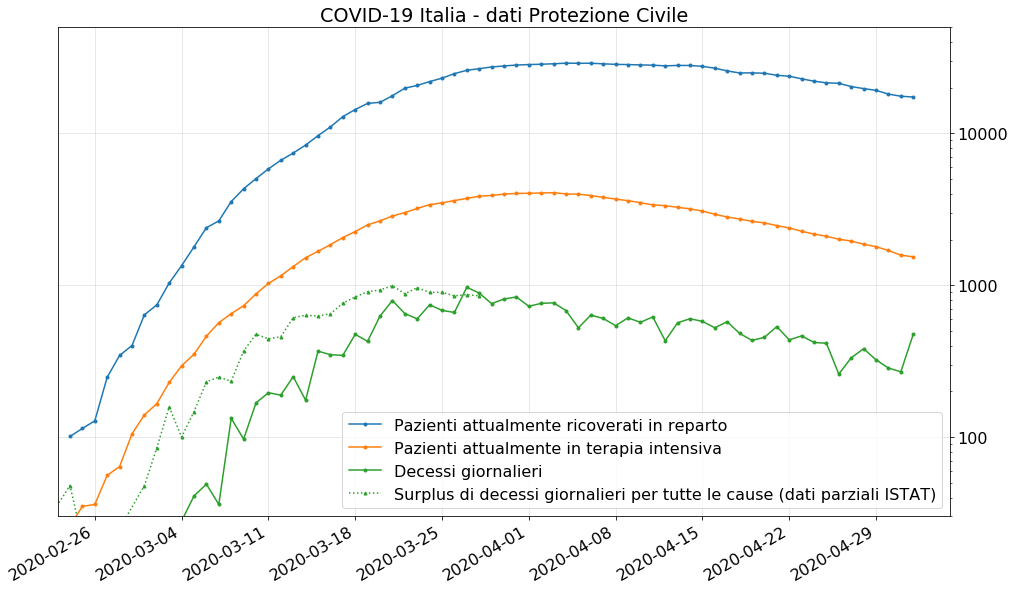

In [27]:
_, ax = covid19.plot.subplots(subplot_kw={'xlim': XLIM})
ax.set(yscale='log', ylim=(30, 50000)) 

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind]
    covid19.plot.plot_data(ax, ds_italy[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, label='Surplus di decessi giornalieri per tutte le cause (dati parziali ISTAT)', color=color, marker='^', linestyle=':', date_interval=7)
    
_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()

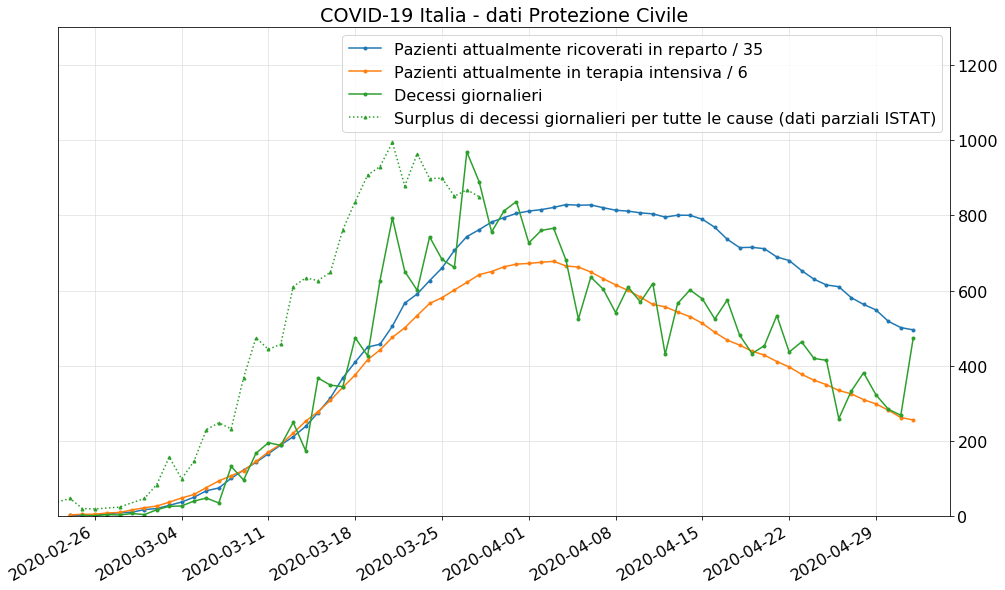

In [28]:
_, ax = covid19.plot.subplots(1, subplot_kw={'xlim': XLIM, 'ylim': (0, 1300)})

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind] + ('' if RATIO[kind] == 1 else f' / {RATIO[kind]}')
    covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, label='Surplus di decessi giornalieri per tutte le cause (dati parziali ISTAT)', color=color, marker='^', linestyle=':', date_interval=7)

_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()
_ = ax.set(ylim=(0, None))

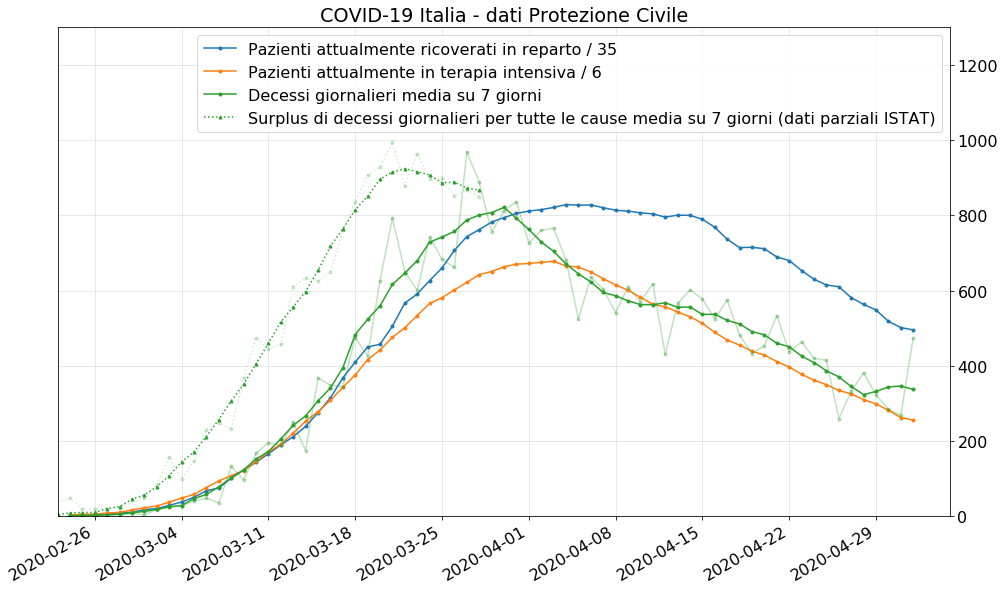

In [29]:
_, ax = covid19.plot.subplots(1, subplot_kw={'xlim': XLIM, 'ylim': (0, 1300)})

for (kind, fits_kind), color in zip(fits.items(), PALETTE_ONE):
    label = LABEL[kind] + ('' if RATIO[kind] == 1 else f' / {RATIO[kind]}')
    if kind == 'daily_deaths':
        covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], color=color, alpha=0.3)
        covid19.plot.plot_data(ax, ds_italy[kind].rolling({'time': 7}, center=True, min_periods=1).mean() / RATIO[kind], label=label + ' media su 7 giorni', color=color)
    else:
        covid19.plot.plot_data(ax, ds_italy[kind] / RATIO[kind], label=label, color=color)

covid19.plot.plot_data(ax, istat_italy, color=color, linestyle=':', alpha=0.2)
covid19.plot.plot_data(ax, istat_italy.rolling({'time': 7}, center=True, min_periods=1).mean(), color=color, label='Surplus di decessi giornalieri per tutte le cause media su 7 giorni (dati parziali ISTAT)', marker='^', linestyle=':', date_interval=7)

_ = ax.set_title(f'COVID-19 Italia - dati Protezione Civile')
_ = ax.set(xlabel="", ylabel="")
_ = ax.legend()
_ = ax.set(ylim=(0, None))

In [30]:
REGIONS_FIT_PARAMS = {
    'Lombardia': {
        'current_severe': [None, '2020-03-07', '2020-03-08', '2020-03-18'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Emilia-Romagna': {
        'current_severe': [None, '2020-03-06', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': [None, '2020-03-23'],
    },
    'Piemonte': {
        'current_severe': [None, '2020-03-20', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Veneto': {
        'current_severe': [None, '2020-03-13', '2020-03-14', '2020-03-24'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Marche': {
        'current_severe': [None, '2020-03-16', '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Liguria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Toscana': {
        'current_severe': [None, '2020-03-19'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Lazio': {
        'current_severe': [None, '2020-03-21', '2020-03-28'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'P.A. Trento': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Campania': {
        'current_severe': [None, '2020-03-26'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Puglia': {
        'current_severe': [None, '2020-03-16', '2020-03-26'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Sicilia': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Abruzzo': {
        'current_severe': [None, '2020-03-21', None],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Friuli Venezia Giulia': {
        'current_severe': [None, '2020-03-16', '2020-03-24', None],
        'current_critical': 0,
        'daily_deaths': ['2020-03-20', '2020-03-31', None],
    },
    'P.A. Bolzano': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Umbria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Calabria': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Sardegna': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Valle d\'Aosta': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Basilicata': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
    'Molise': {
        'current_severe': [None, '2020-03-21'],
        'current_critical': 0,
        'daily_deaths': 4,
    },
}

In [15]:
STOP_FIT = '2020-04-03'

region_fits = {}
for region, params in REGIONS_FIT_PARAMS.items():
    region_fits[region] = {}
    for kind, breaks in params.items():
        if isinstance(breaks, int):
            breaks = [np.datetime64(b) + breaks * DAY if b is not None else b for b in params['current_severe']]
        region_fits[region][kind] = covid19.fit.fit_exponential_segments(ds_italy_regions.sel(location=f'Italy / {region}')[kind], breaks=breaks)

skipping start=None stop=2020-03-15T00:00:00
skipping start=None stop=2020-03-19T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-20T00:00:00
skipping start=None stop=2020-03-24T00:00:00
skipping start=None stop=2020-03-20T00:00:00
skipping start=None stop=2020-03-24T00:00:00


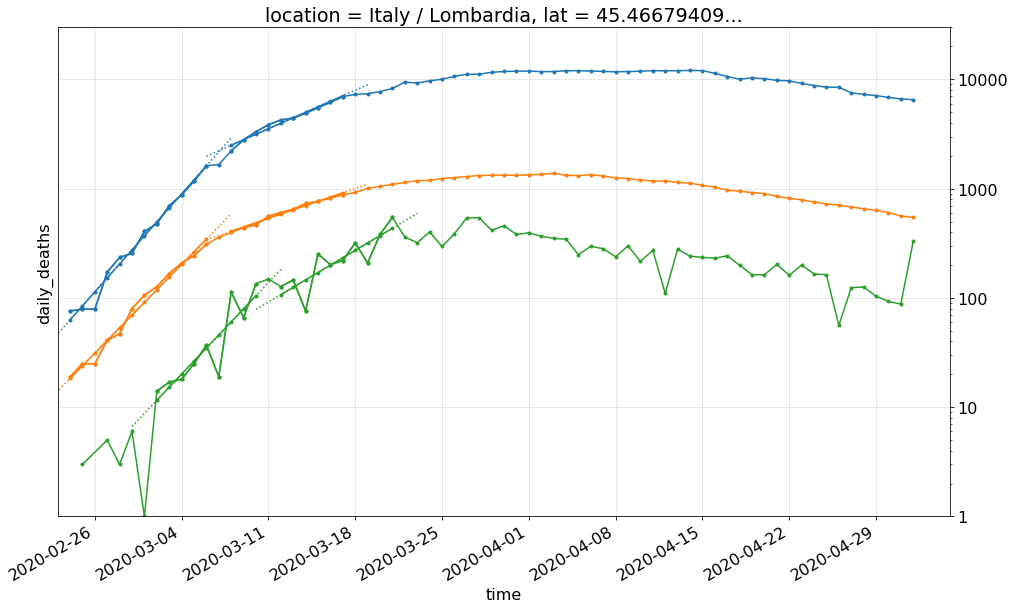

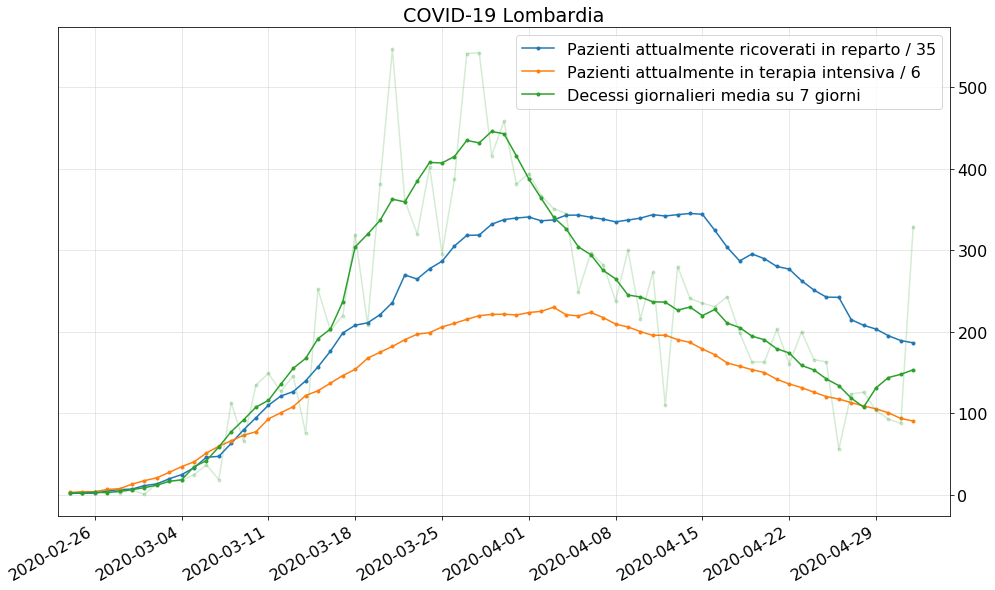

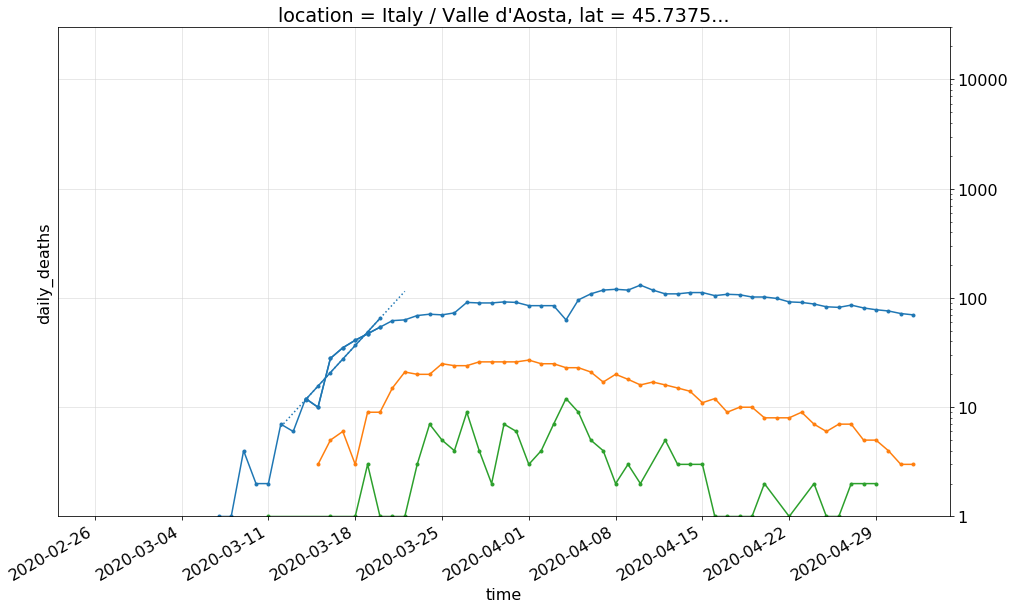

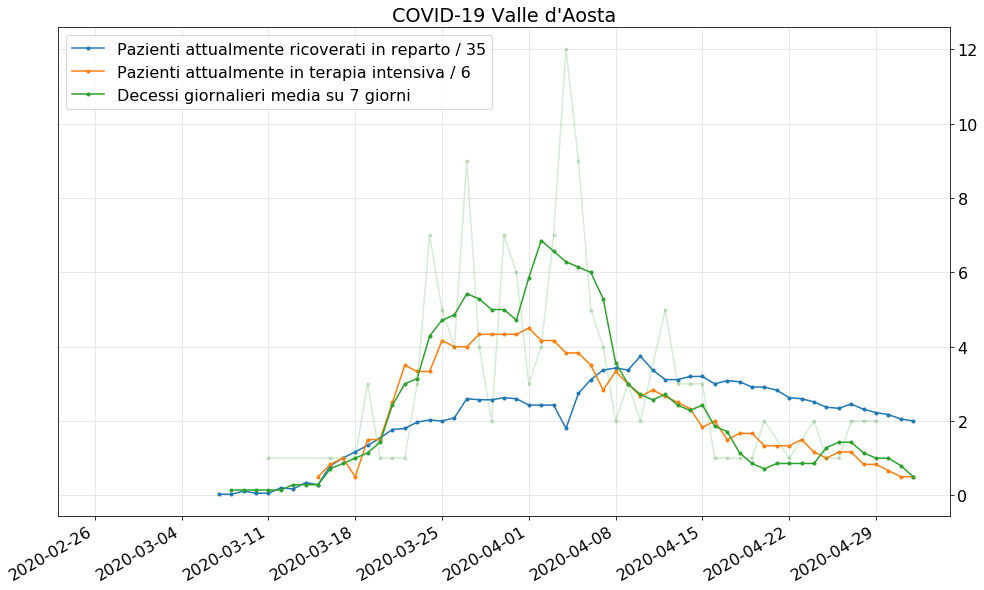

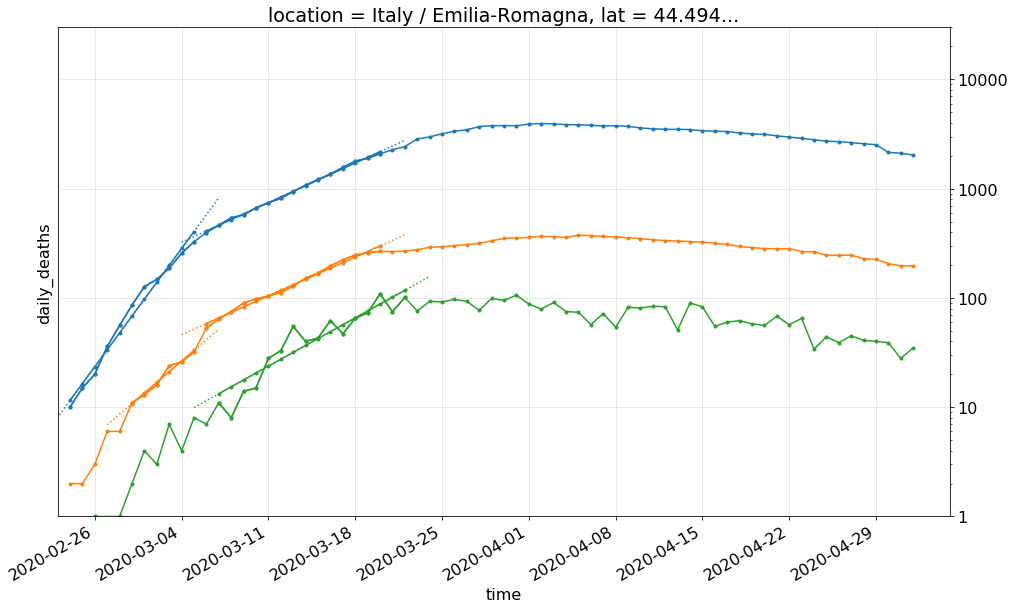

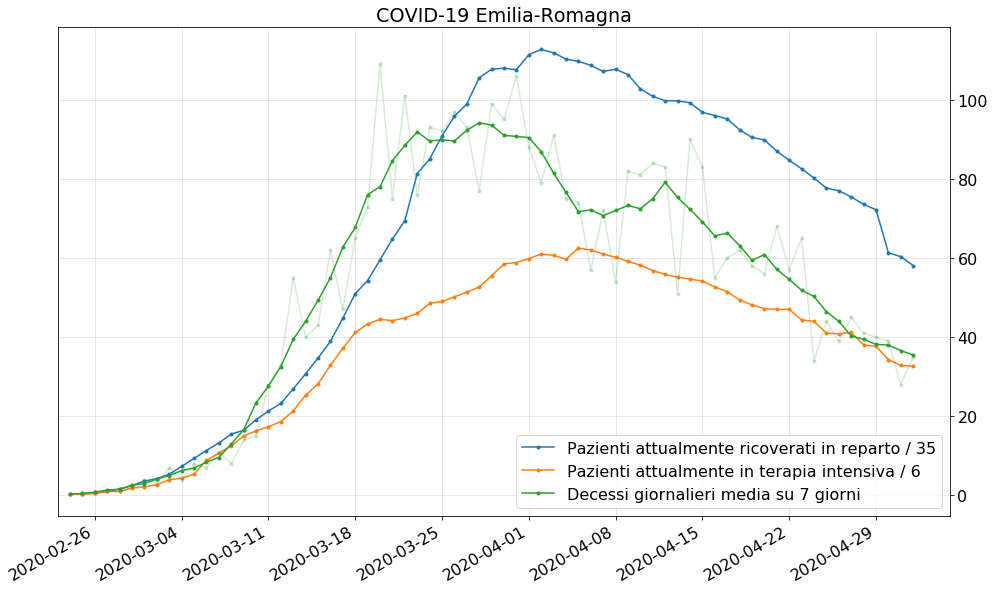

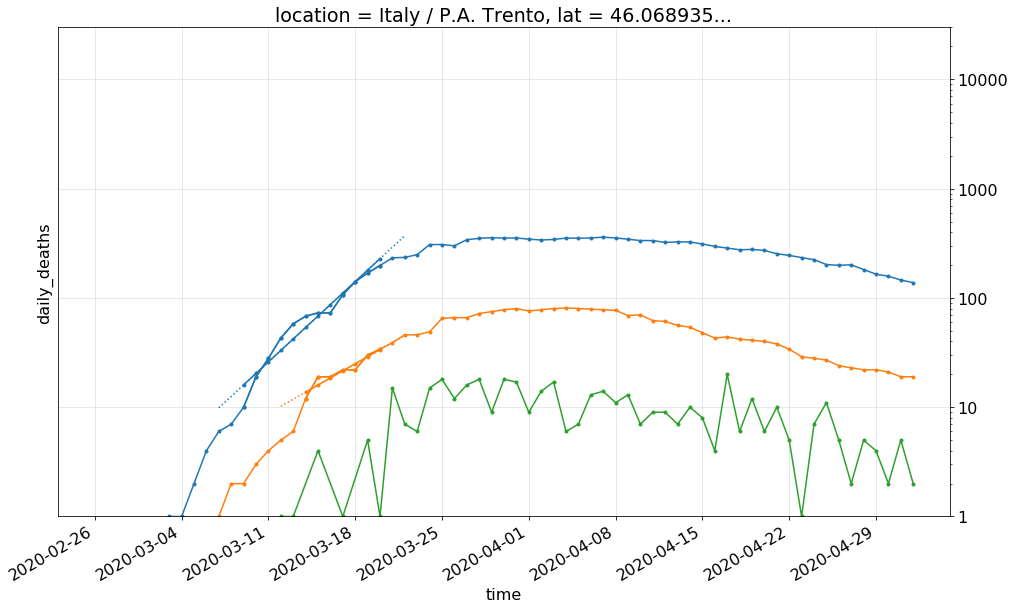

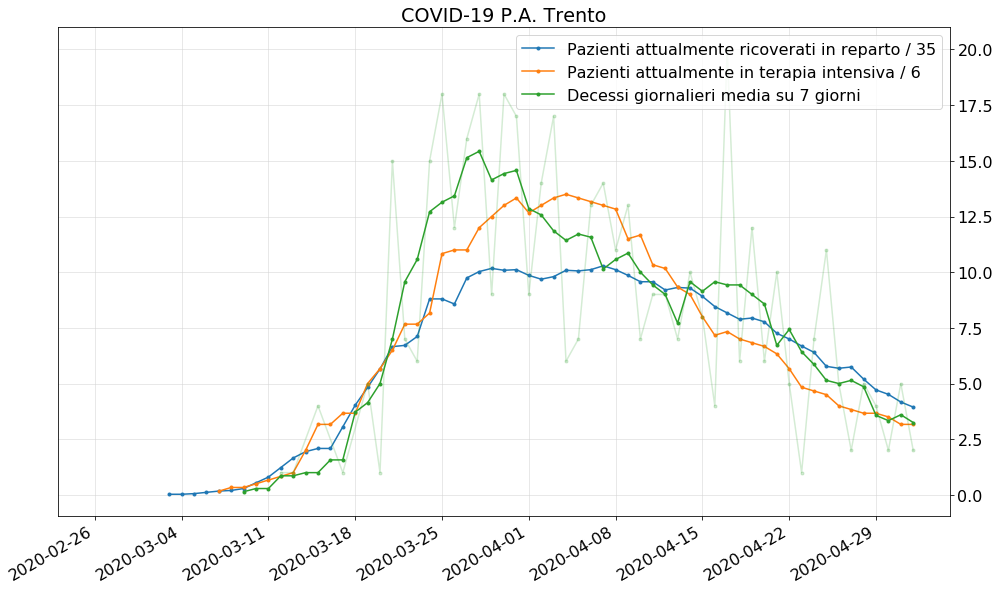

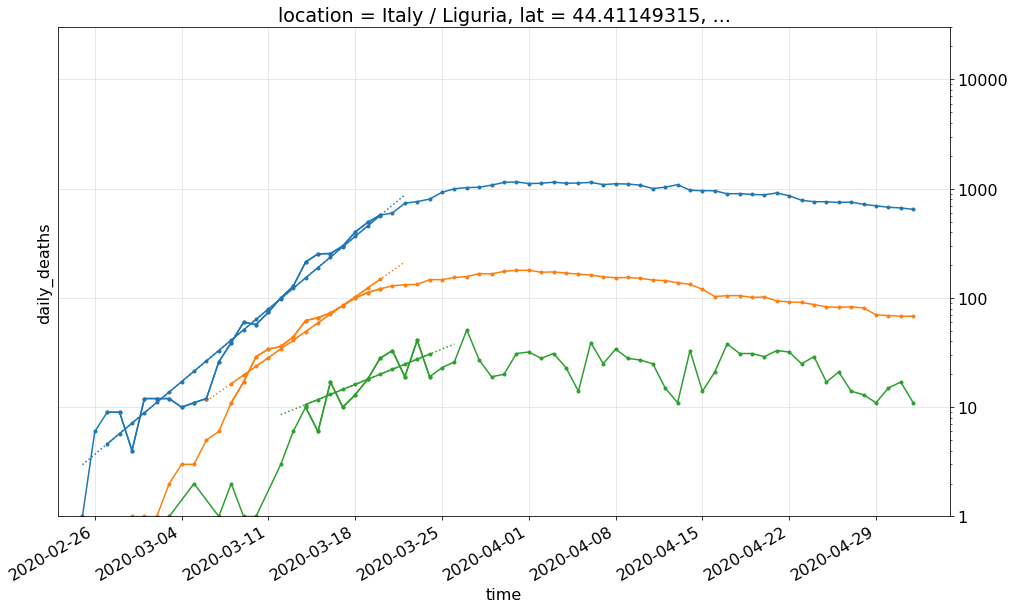

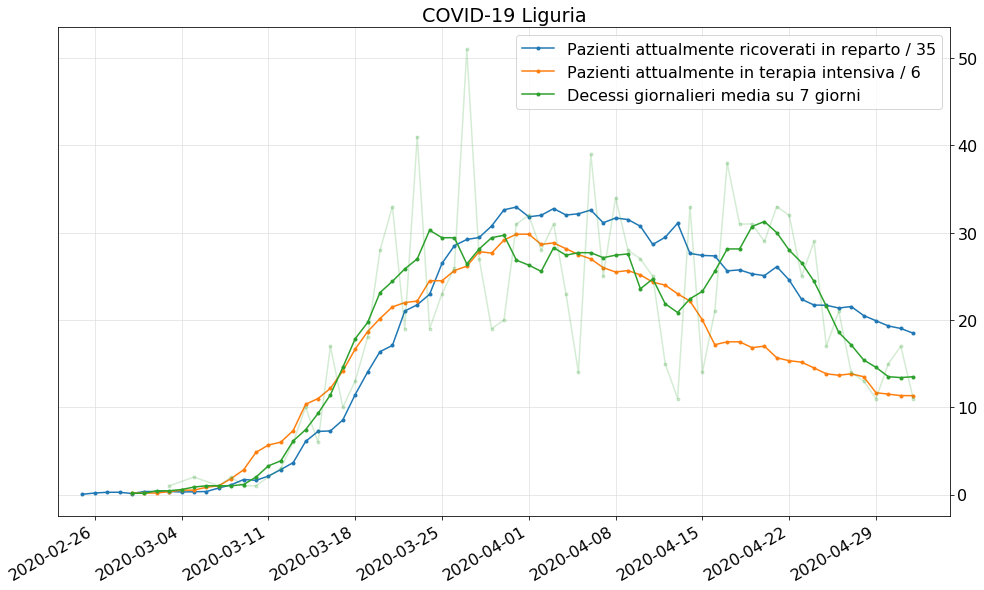

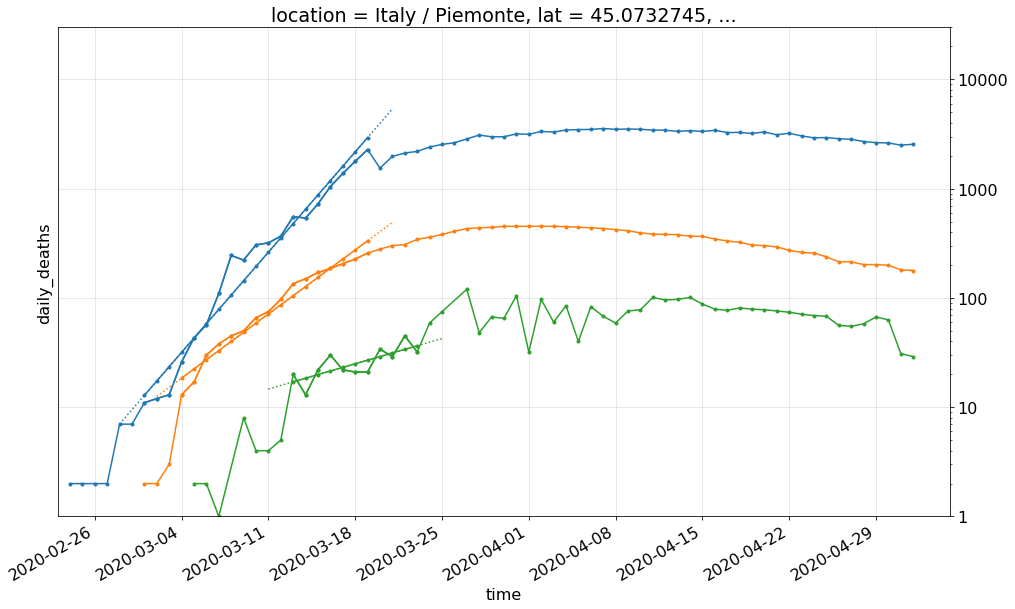

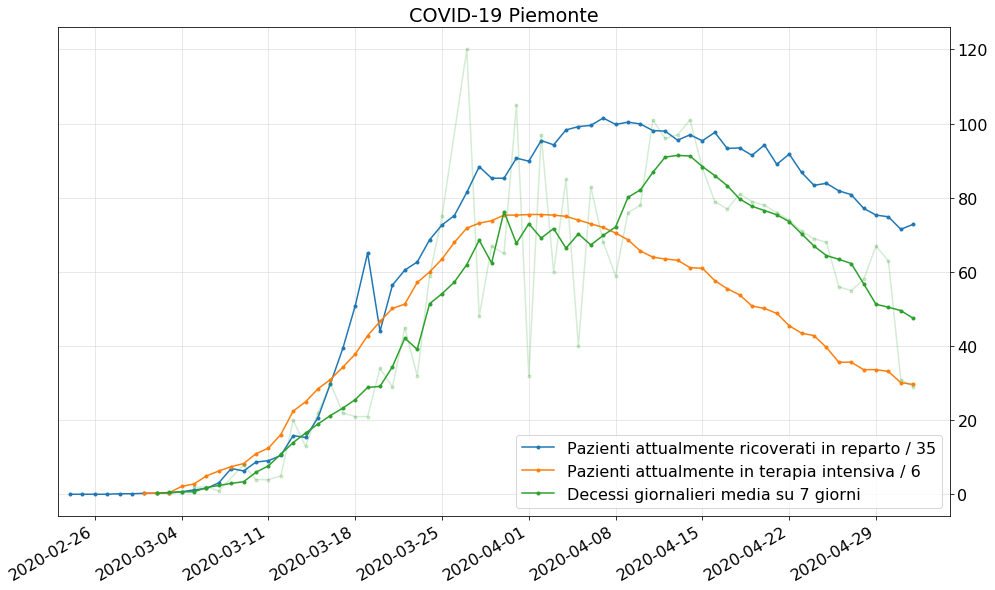

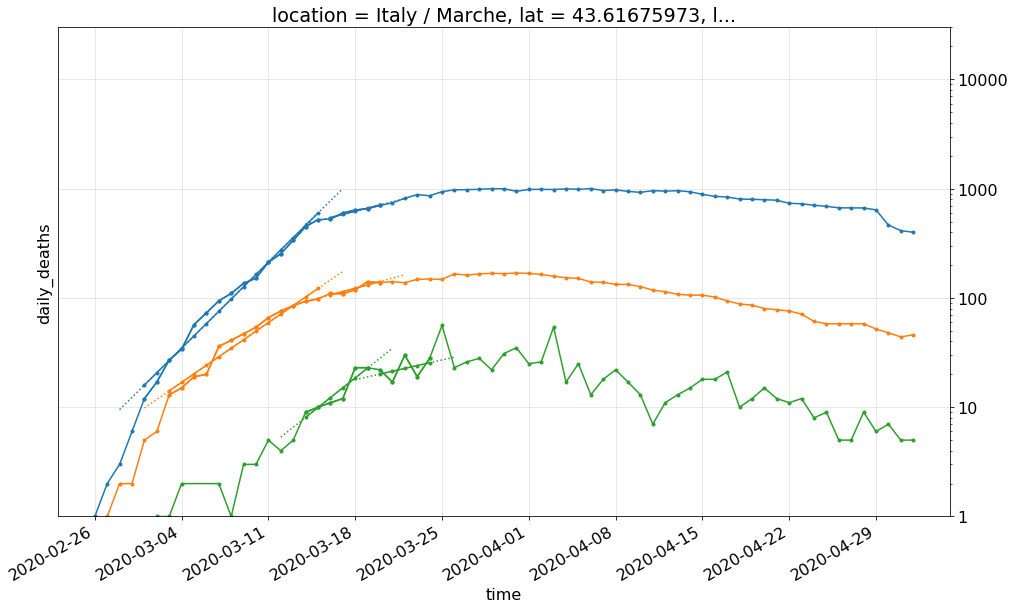

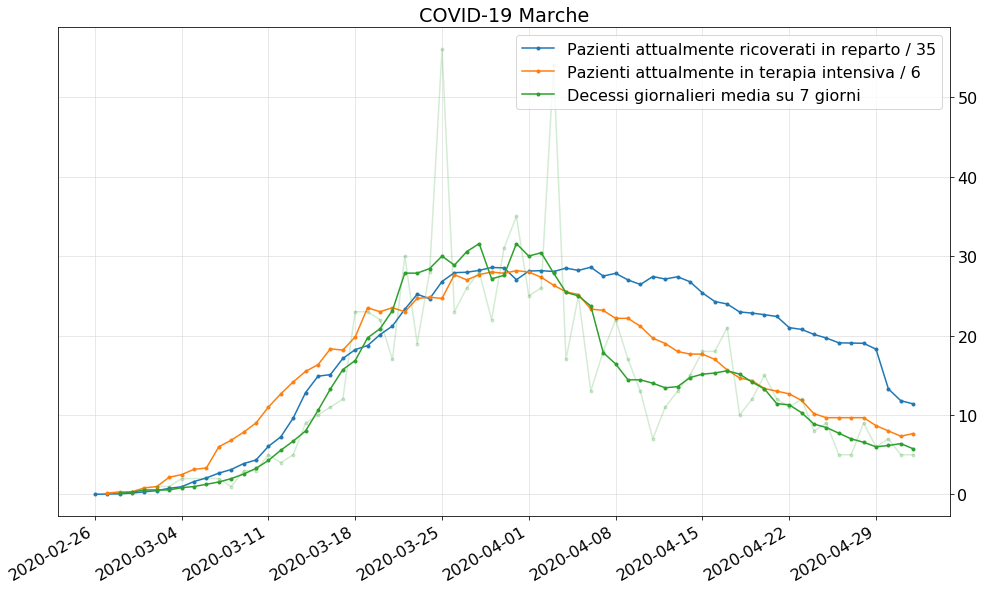

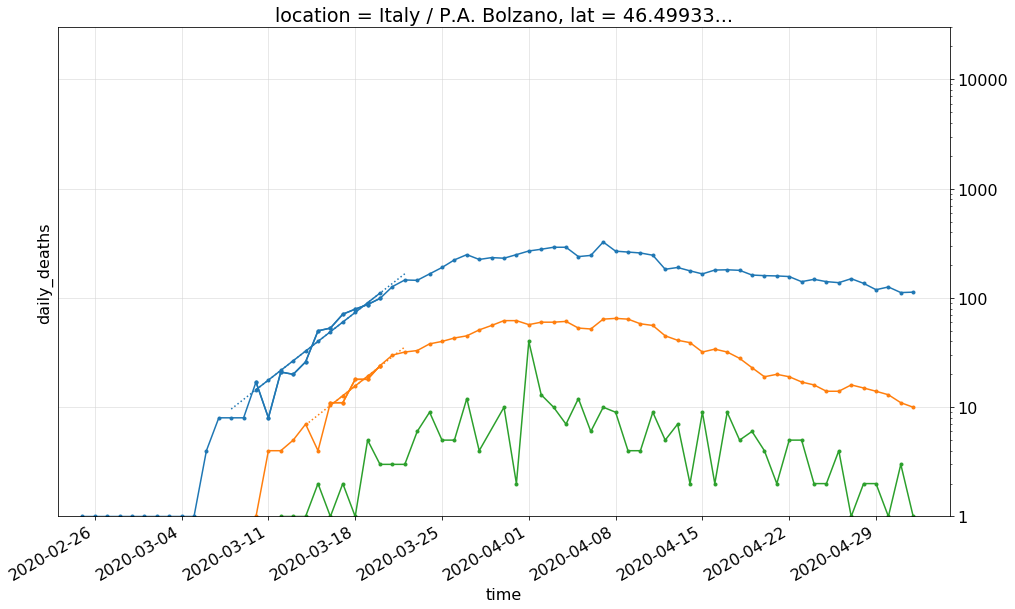

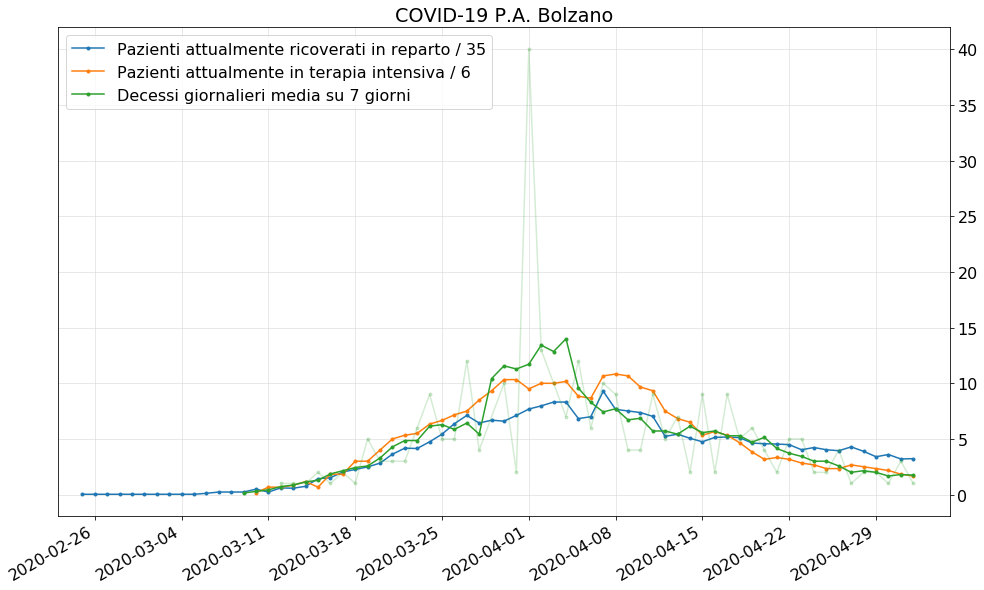

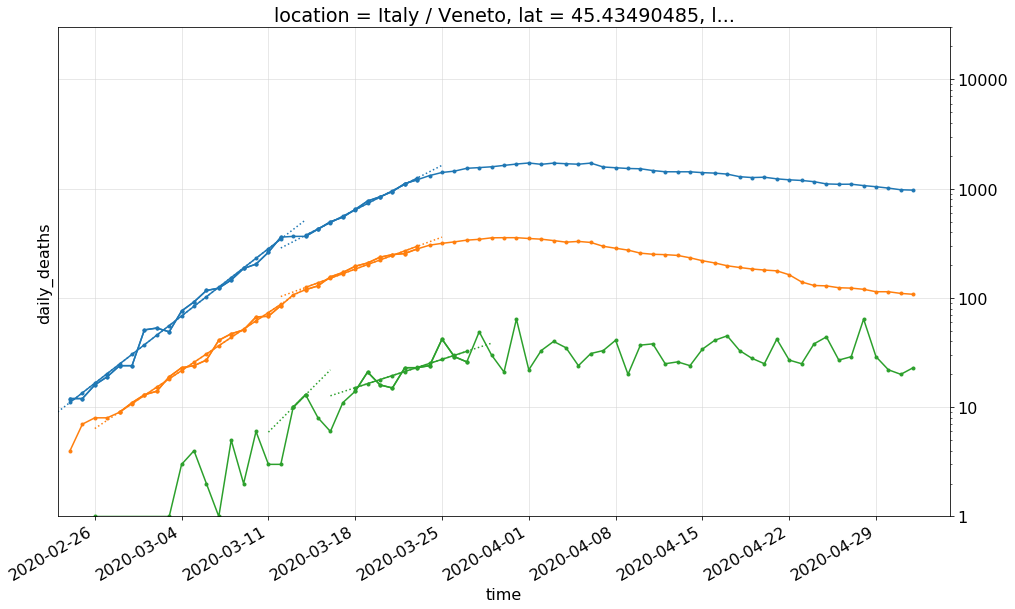

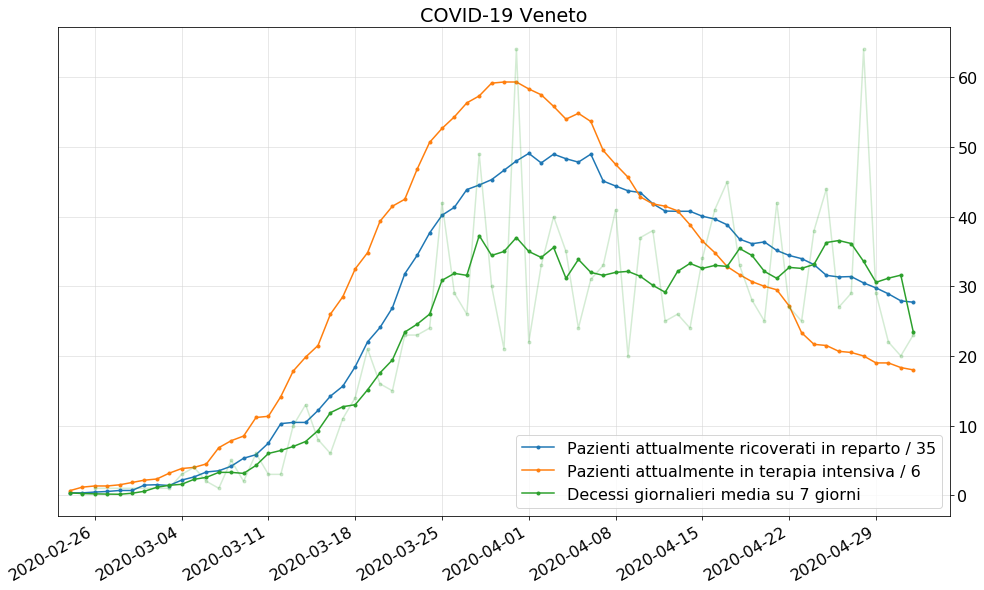

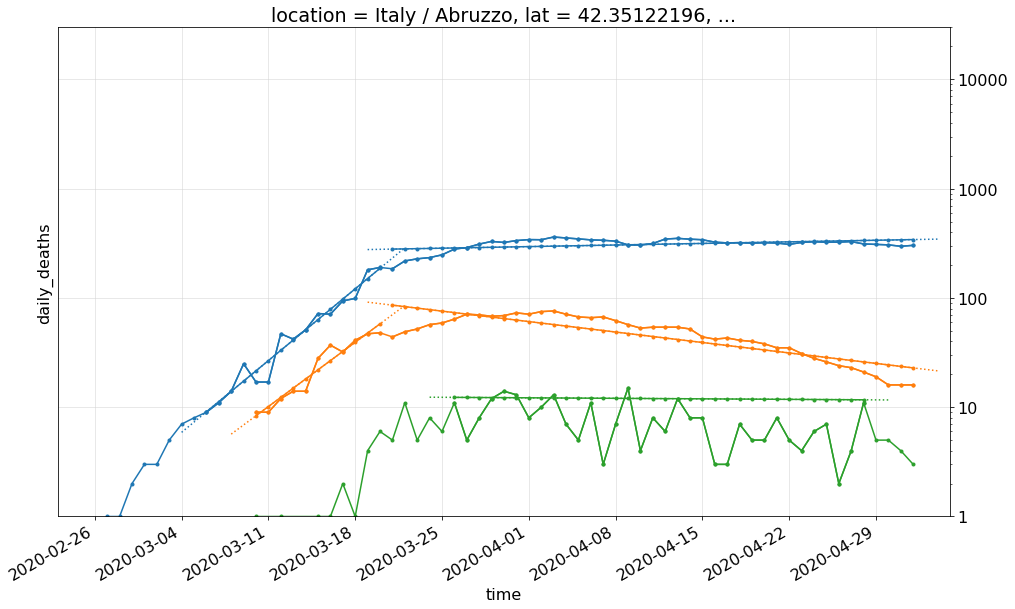

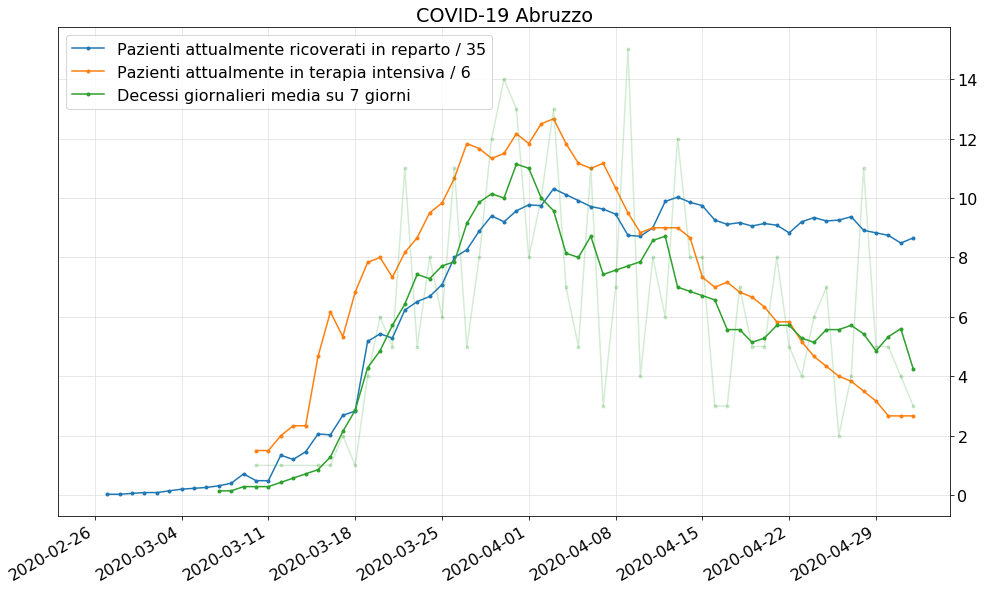

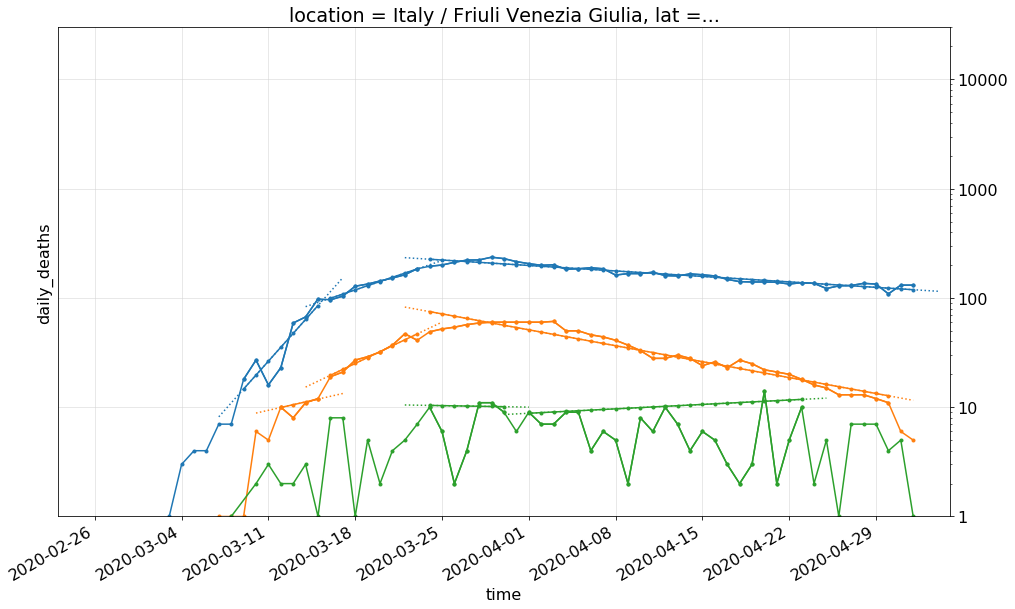

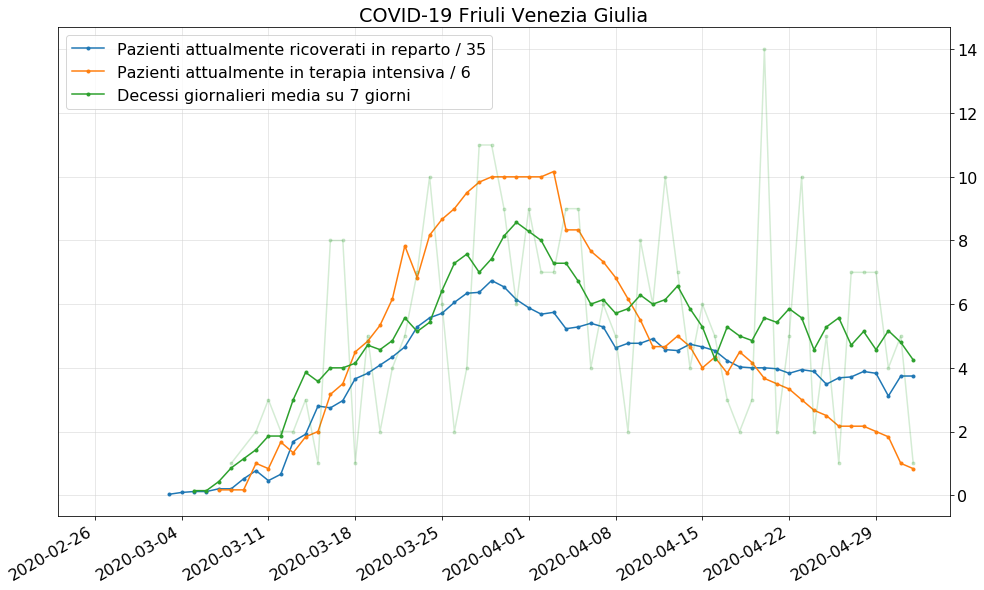

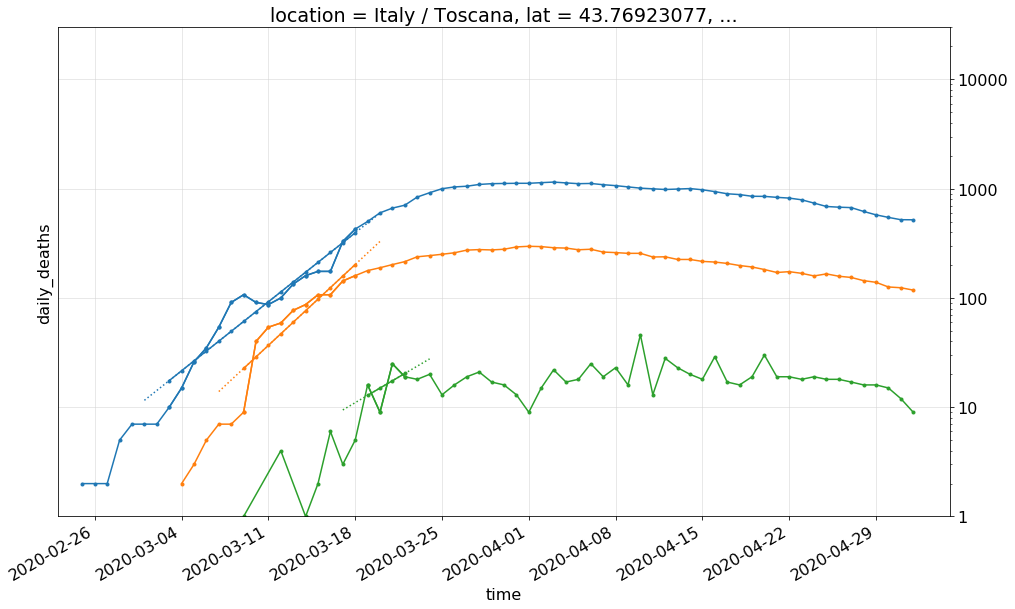

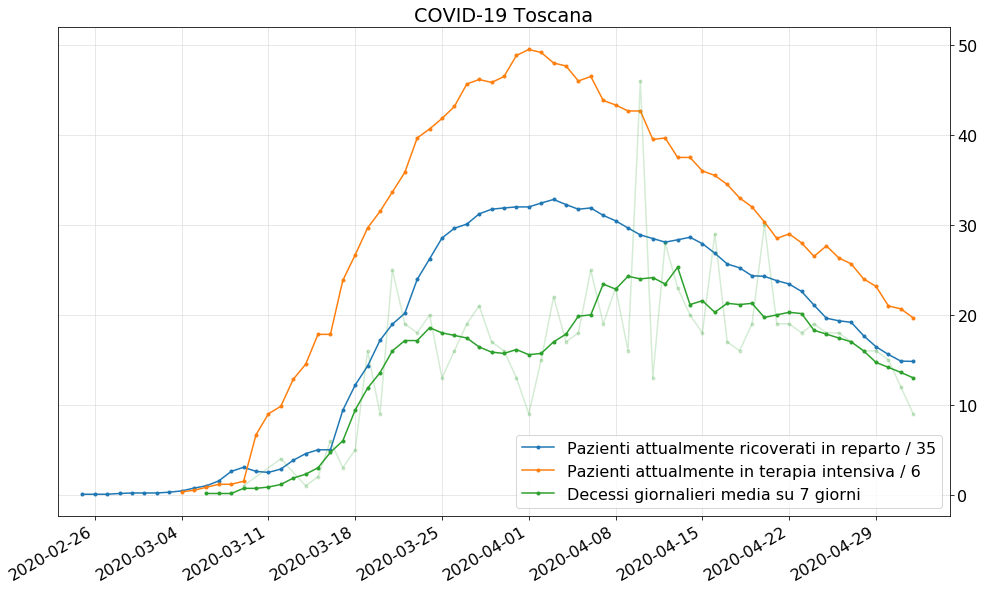

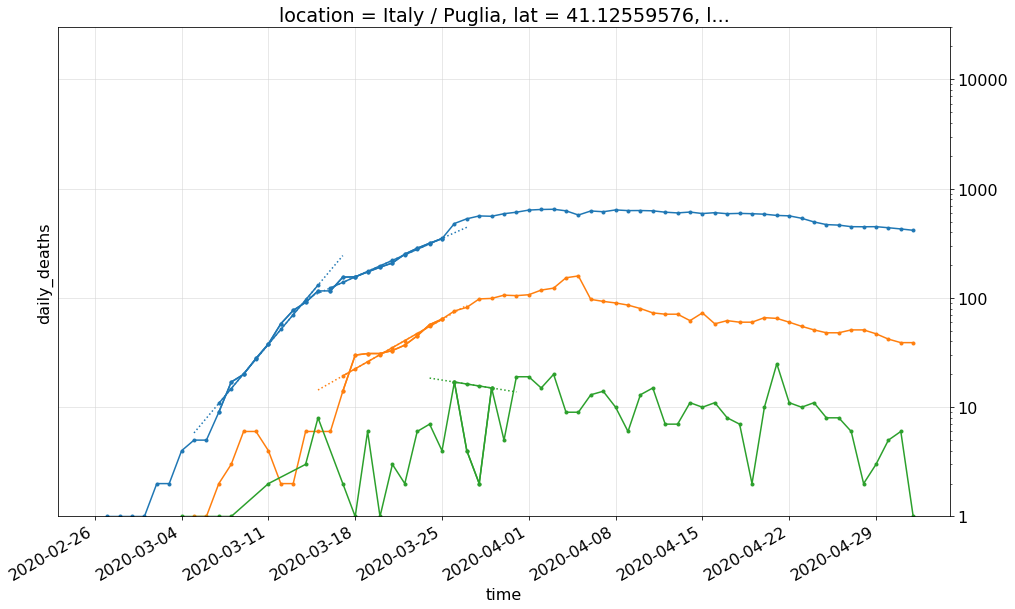

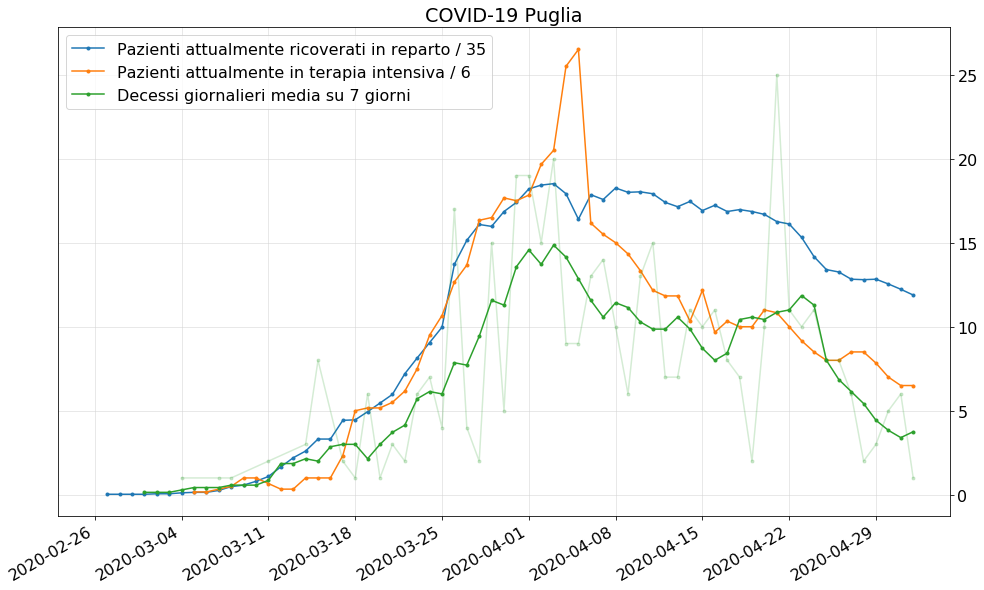

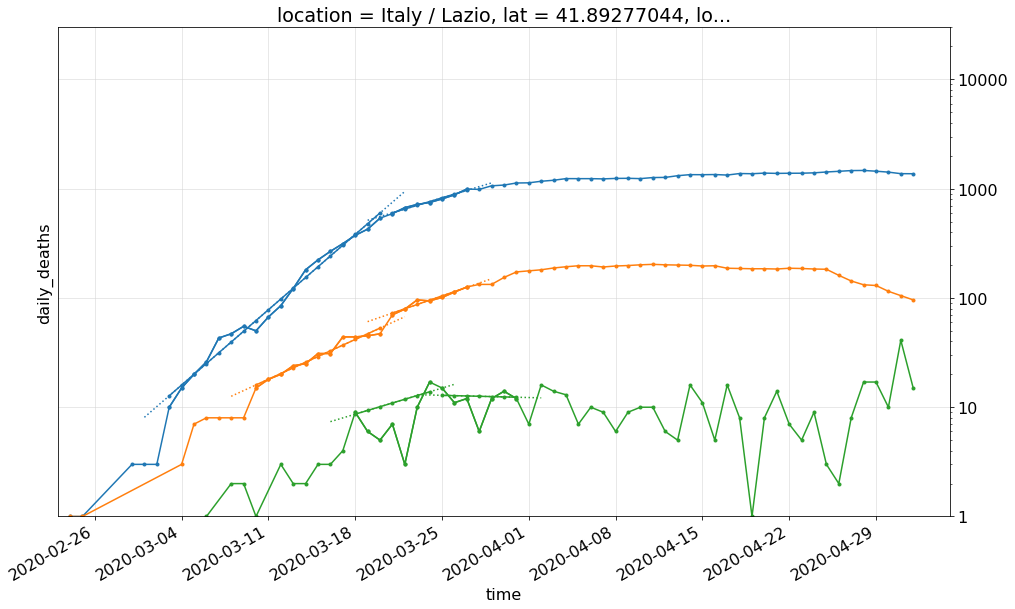

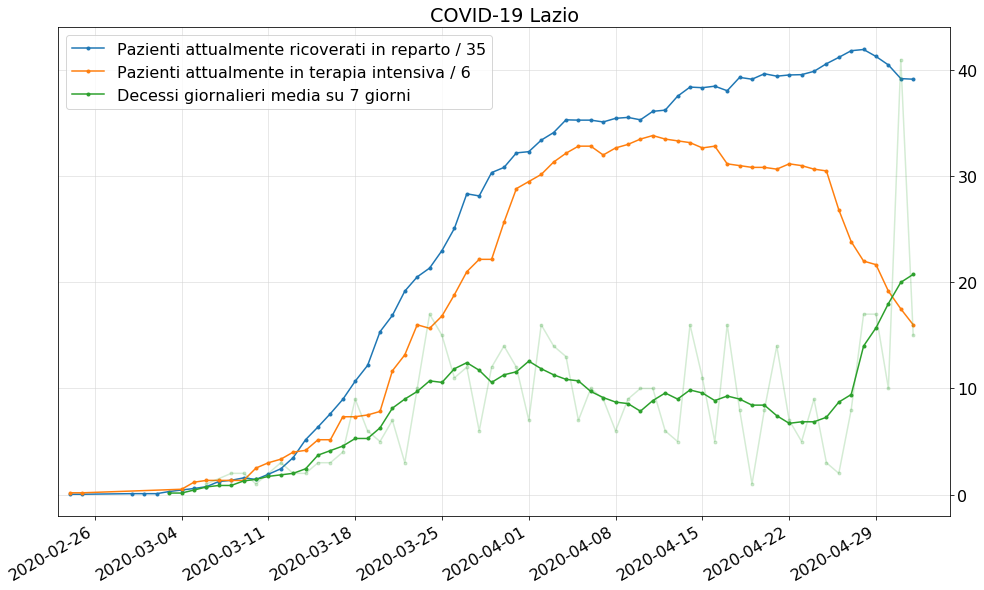

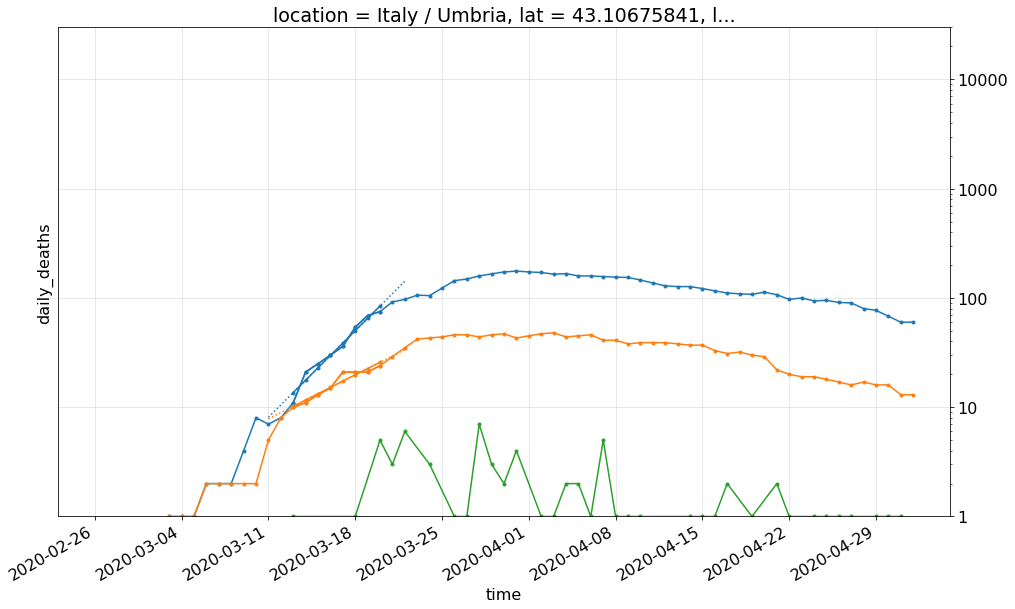

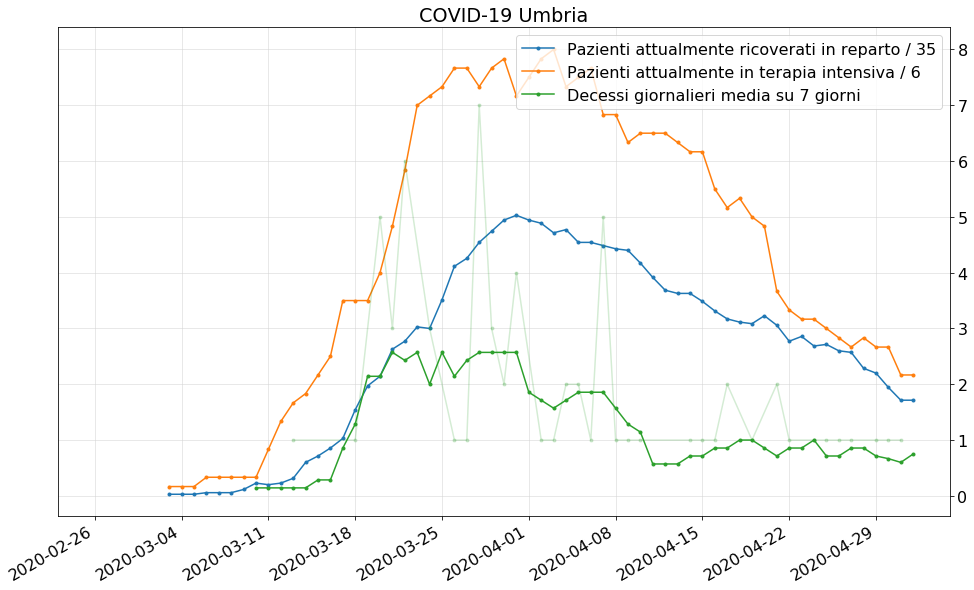

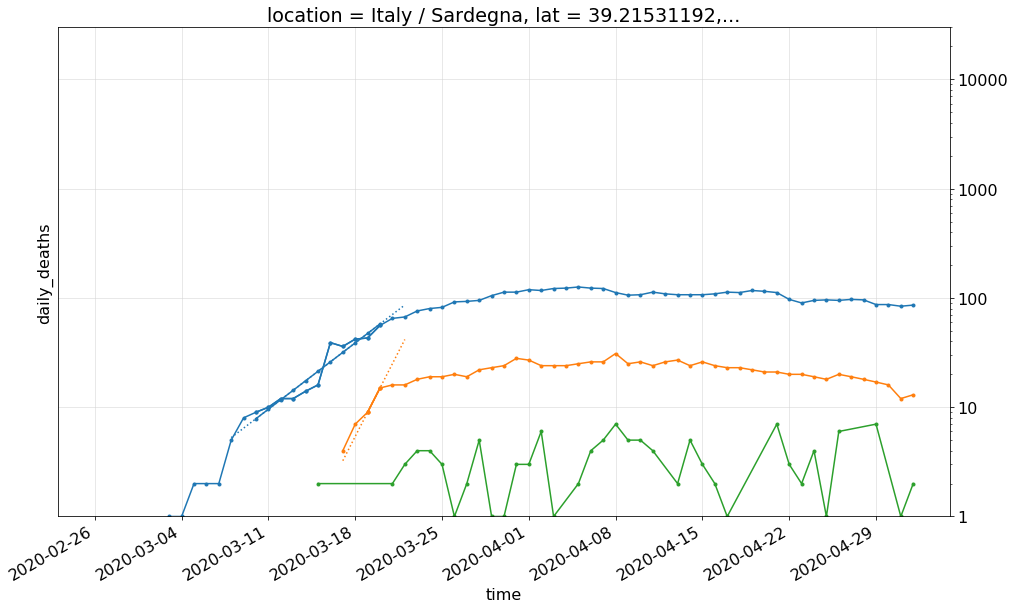

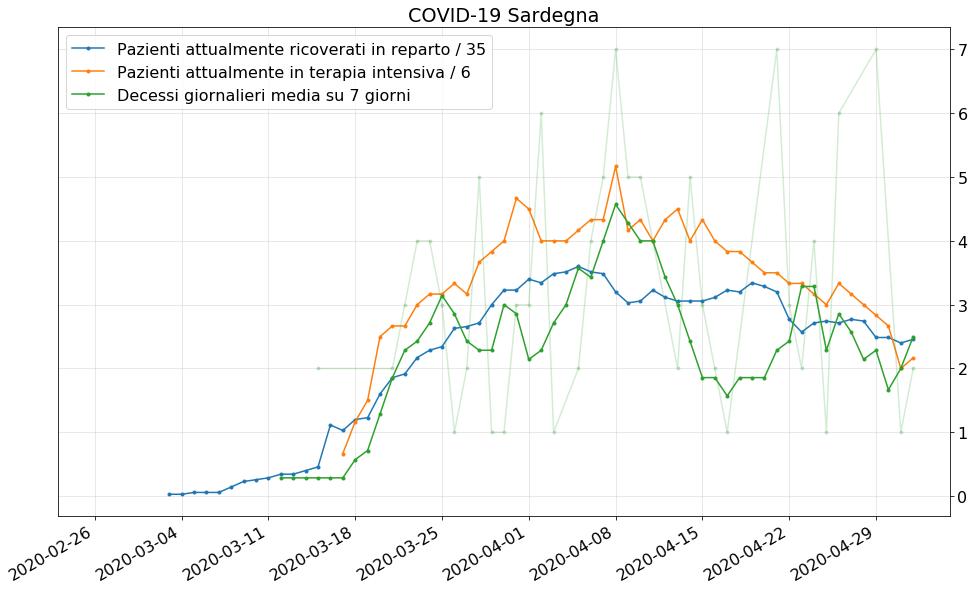

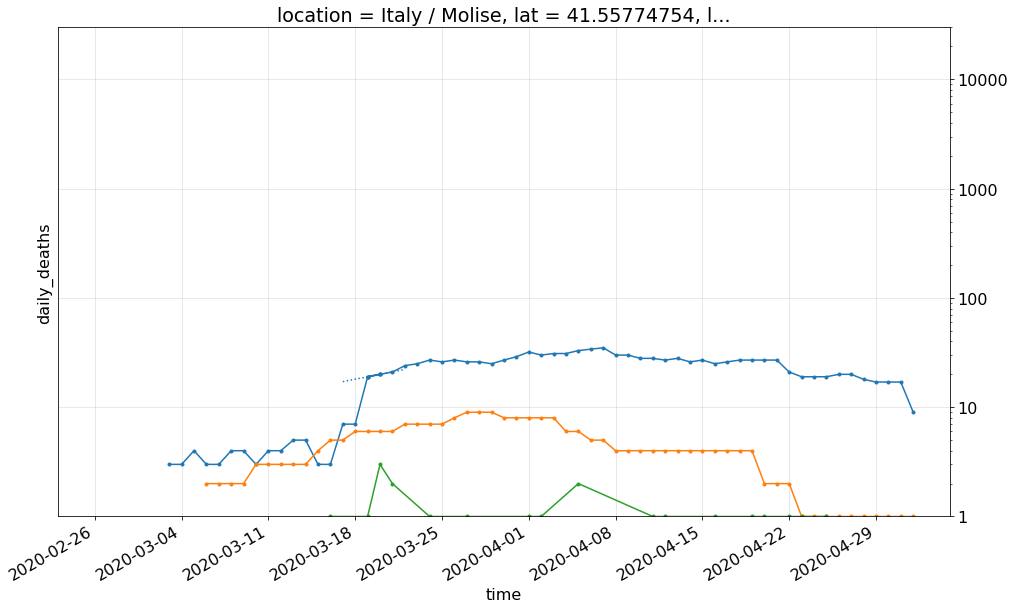

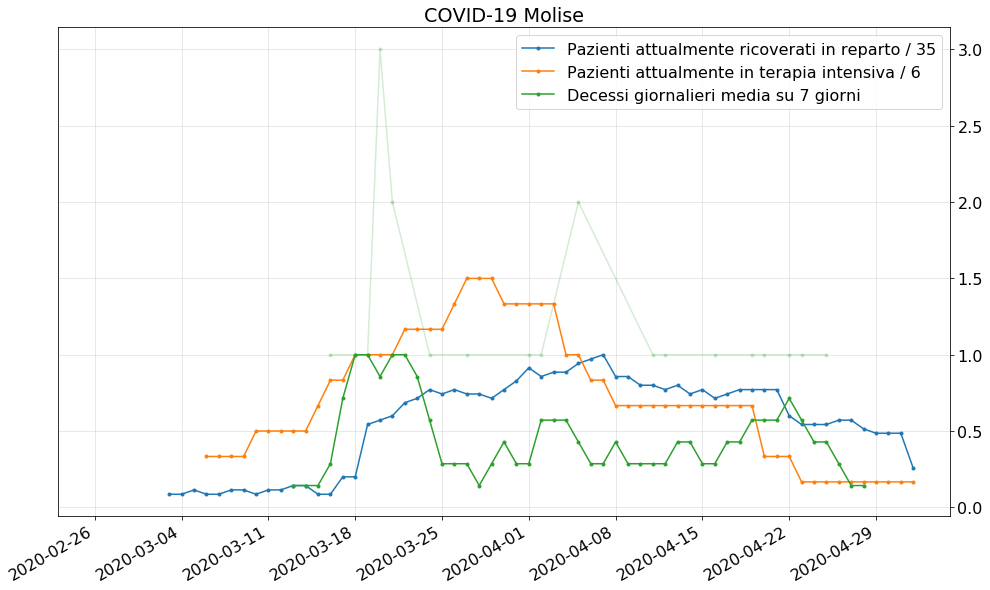

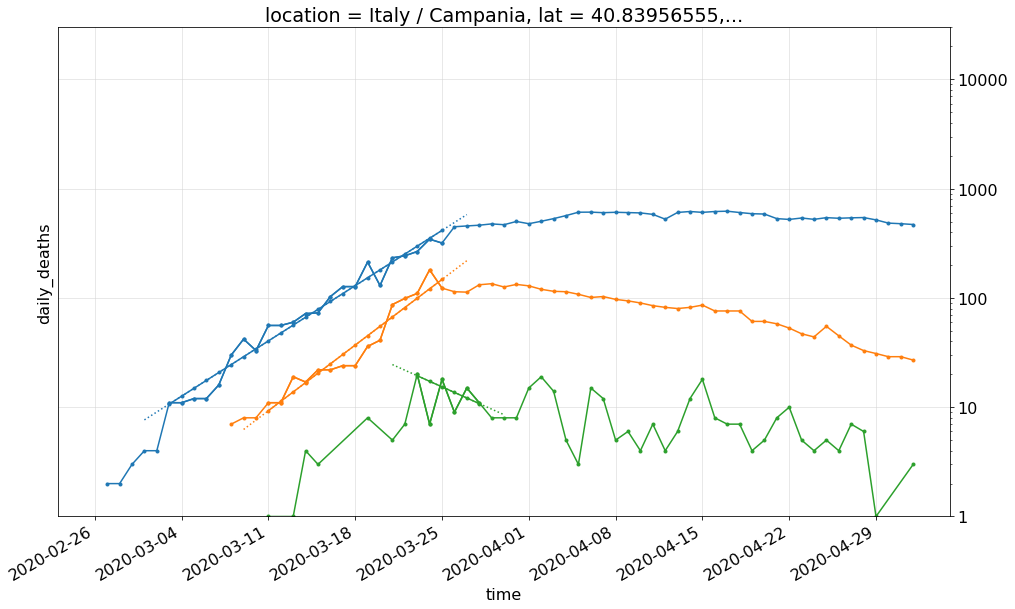

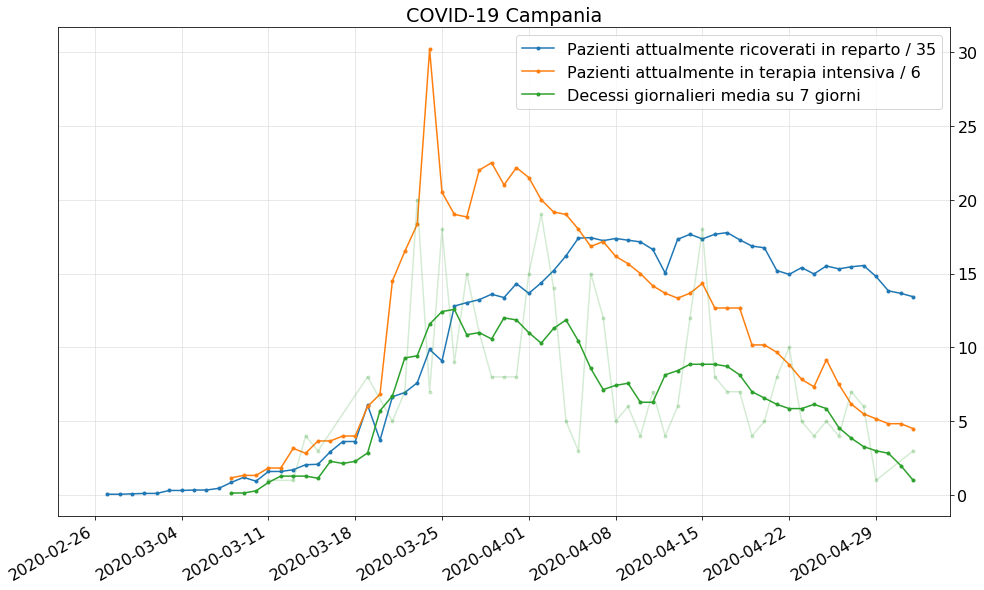

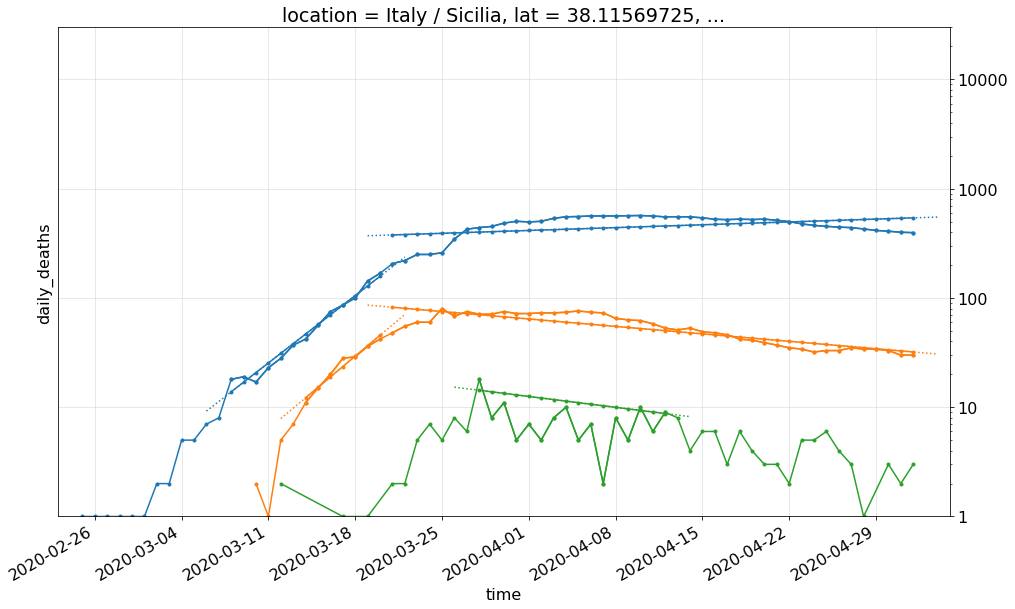

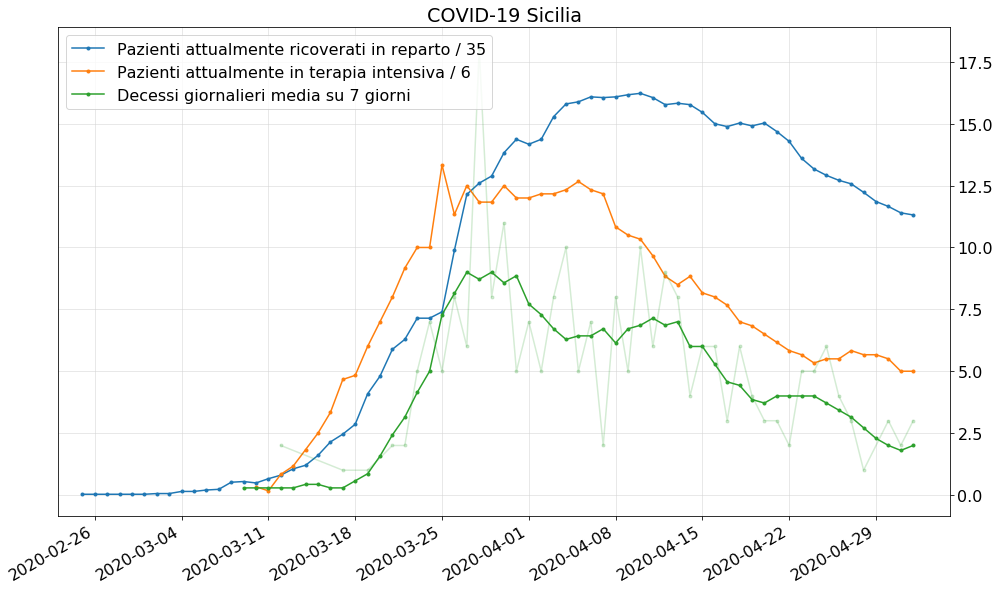

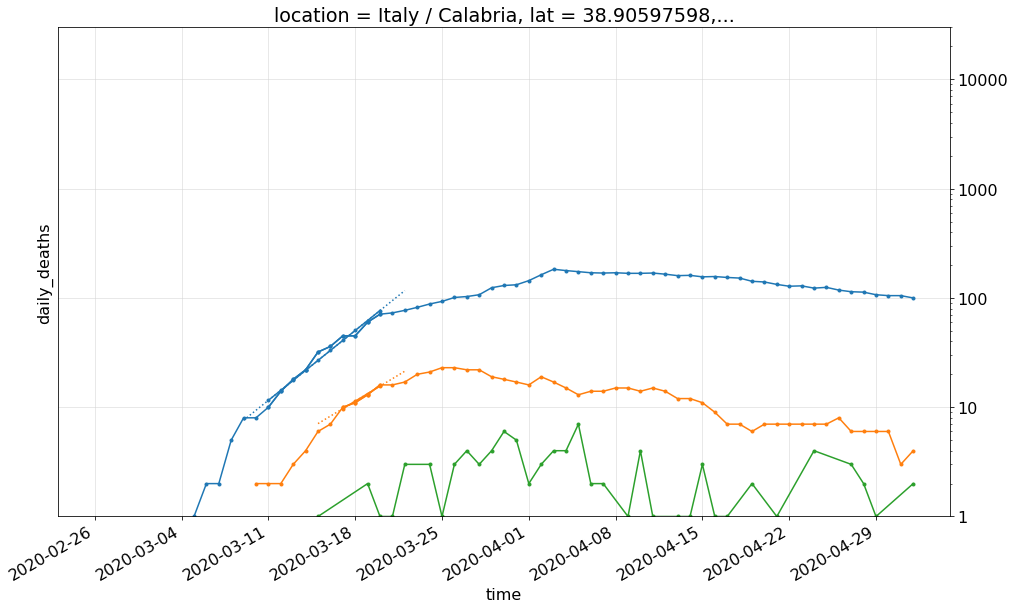

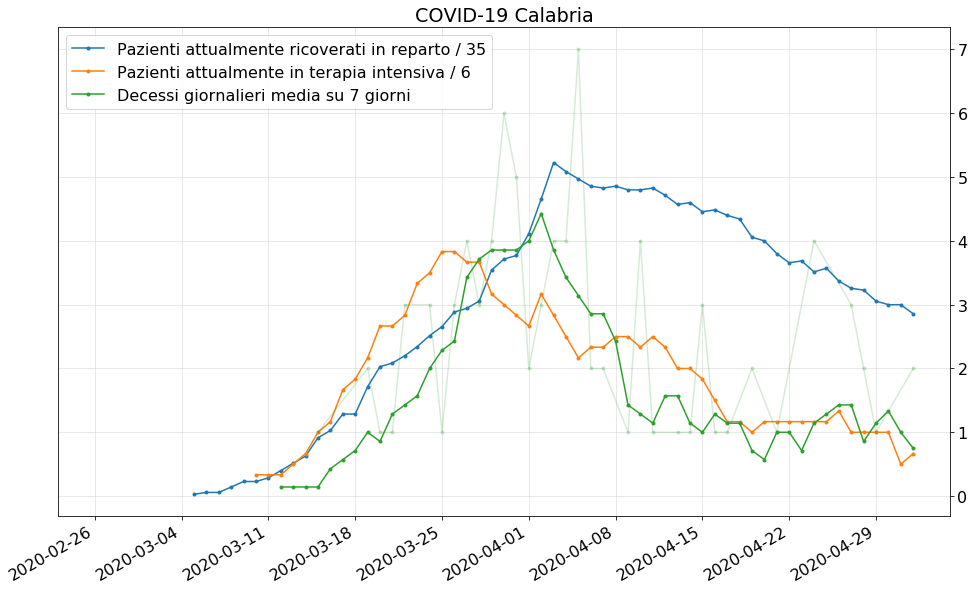

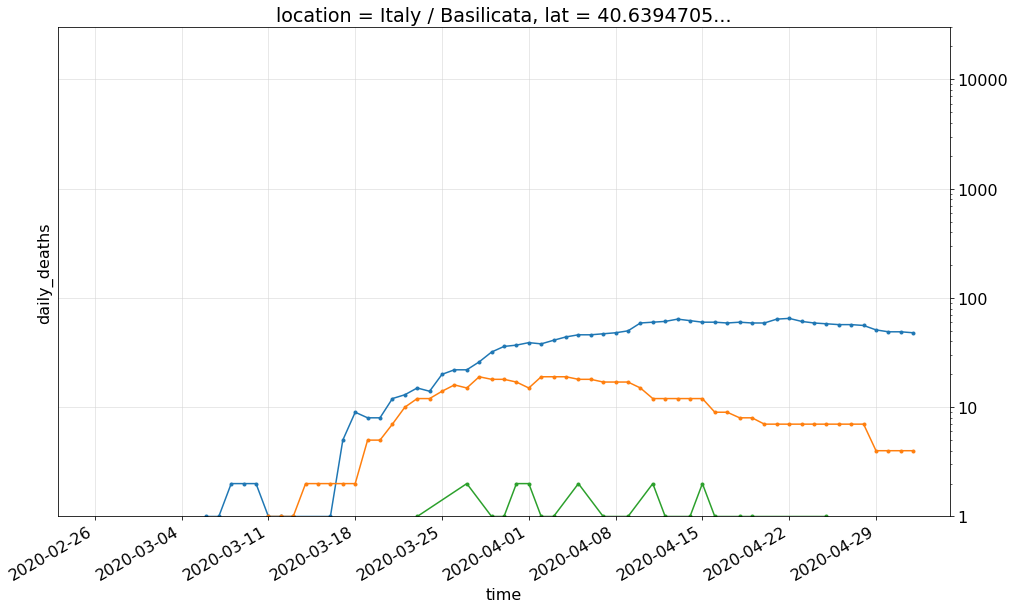

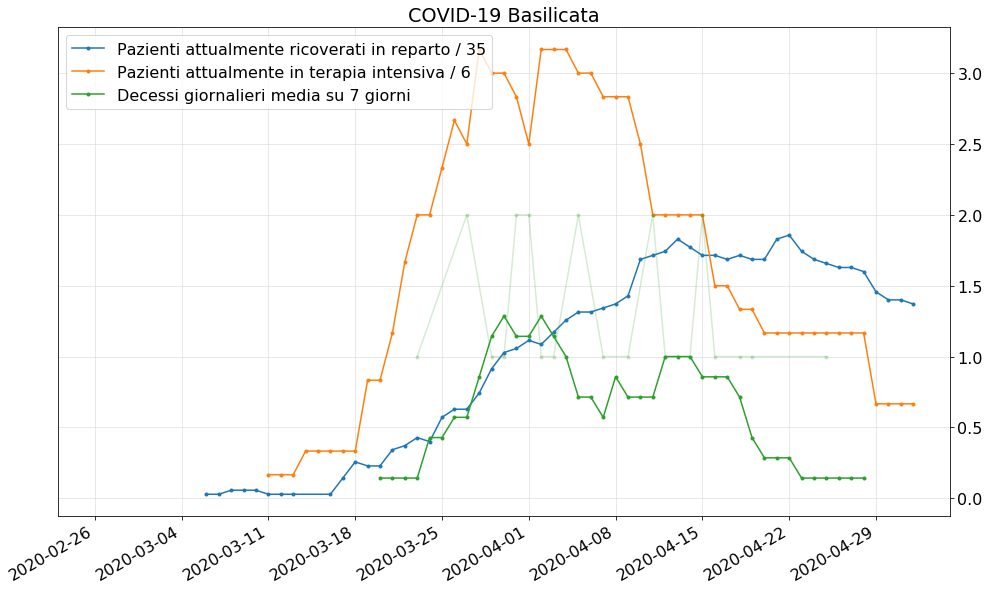

In [32]:
for region in REGIONS:
    fit_kinds = region_fits[region]
    ds_region = ds_italy_regions.sel(location=f'Italy / {region}')
    
    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.set(yscale='log', ylim=(1, 30000)) 
    ax.set_title(f'COVID-19 {region}')
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

    for (kind, fitsk), color in zip(fit_kinds.items(), PALETTE_ONE):
        label = LABEL[kind]
        covid19.plot.plot_data(ax, ds_region[kind], label=label, color=color)
        for fit in fitsk:
            covid19.plot.plot(ax, ds_region[kind], fit, color=color, date_interval=7, add_diff=False)

    _, ax = plt.subplots(1, subplot_kw={'xlim': XLIM})
    ax.yaxis.tick_right()
    ax.yaxis.grid(color='lightgrey', linewidth=0.5)
    ax.xaxis.grid(color='lightgrey', linewidth=0.5)

#    covid19.plot.plot_data(ax, data[region]['variazione_deaths_4'], label=label, color=color, alpha=0.5)
    for (kind, fitsk), color in zip(fit_kinds.items(), PALETTE_ONE):
        ratio = RATIO[kind]
        label = LABEL[kind] + ('' if ratio == 1 else f' / {ratio}')
        if kind == 'daily_deaths':
            covid19.plot.plot_data(ax, ds_region[kind] / RATIO[kind], color=color, alpha=0.2)
            covid19.plot.plot_data(ax, ds_region[kind].rolling({'time': 7}, center=True, min_periods=1).mean() / RATIO[kind], label=label + ' media su 7 giorni', color=color)
        else:
            covid19.plot.plot_data(ax, ds_region[kind] / RATIO[kind], label=label, color=color)
    ax.set_title(f'COVID-19 {region}')
    ax.set(xlabel="", ylabel="")
    ax.legend()


In [17]:
print('## Initial exponential speed')
for region, fit_kinds in region_fits.items():
    if len(fit_kinds['daily_deaths']):
        print(f'{region}:{" " * (14 - len(region))} {str(fit_kinds["daily_deaths"][0])}')

## Initial exponential speed
Lombardia:      T_d=2.52 t_0='2020-02-22' r^2=0.879 start='2020-03-02' stop='2020-03-10'
Emilia-Romagna: T_d=4.77 t_0='2020-02-18' r^2=0.940 start='2020-03-07' stop='2020-03-22'
Piemonte:       T_d=9.13 t_0='2020-02-04' r^2=0.750 start='2020-03-13' stop='2020-03-23'
Veneto:         T_d=2.64 t_0='2020-03-04' r^2=1.000 start='2020-03-13' stop='2020-03-14'
Marche:         T_d=3.33 t_0='2020-03-03' r^2=0.928 start='2020-03-14' stop='2020-03-19'
Liguria:        T_d=6.52 t_0='2020-02-20' r^2=0.717 start='2020-03-14' stop='2020-03-24'
Toscana:        T_d=4.51 t_0='2020-03-02' r^2=0.460 start='2020-03-19' stop='2020-03-22'
Lazio:          T_d=8.82 t_0='2020-02-19' r^2=0.741 start='2020-03-18' stop='2020-03-24'
Campania:       T_d=-5.91 t_0='2020-04-17' r^2=-0.674 start='2020-03-23' stop='2020-03-28'
Puglia:         T_d=-16.61 t_0='2020-06-01' r^2=-1.000 start='2020-03-26' stop='2020-03-29'
Sicilia:        T_d=-21.19 t_0='2020-06-17' r^2=-0.787 start='2020-03-28' st